In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Vector Algebra

I vettori di numpy seguono l'algebra lineare degli spazi affini

In [4]:
v_0 = np.array([0, 1])
v_1 = np.array([1,0 ])
v_sum = v_0 + v_1

vector_norm = np.linalg.norm(v_sum)
versor = v_sum / vector_norm

print("Sum of vectors        : " + str(v_sum))
print("Vector Euclidean norm : " + str(vector_norm))
print("Versor                : " + str(versor))


Sum of vectors        : [1 1]
Vector Euclidean norm : 1.4142135623730951
Versor                : [0.70710678 0.70710678]


[0 1]
[1 0]
[0.70710678 0.70710678]


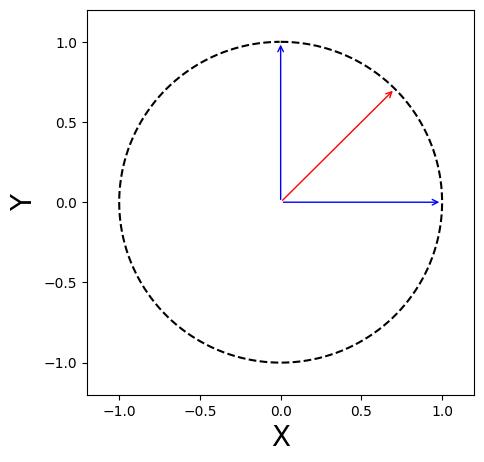

In [5]:
def plot_vector_in_circle(v_0, v_1, versor):


    n_circle_points = 1000
    r = 1
    theta = 2*math.pi*np.arange(n_circle_points)/n_circle_points
    x_circle = r*np.sin(theta)
    y_circle = r*np.cos(theta)

    fig, ax = plt.subplots(figsize=(5,5))
    print(v_0)
    print(v_1)
    print(versor)
    plt.annotate("", xytext=(0, 0), xy=(v_0[0], v_0[1]), arrowprops=dict(arrowstyle="->", color="b"))
    plt.annotate("", xytext=(0, 0), xy=(v_1[0], v_1[1]), arrowprops=dict(arrowstyle="->", color="b"))
    plt.annotate("", xytext=(0, 0), xy=(versor[0], versor[1]), arrowprops=dict(arrowstyle="->", color="r"))
    plt.plot(x_circle, y_circle, c='black', linestyle="--")
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    ax.set_xlabel("X", size=20)
    ax.set_ylabel("Y", size=20)
    plt.show()
    return ax


ax = plot_vector_in_circle(v_0, v_1, versor)

# Fit di serie di punti

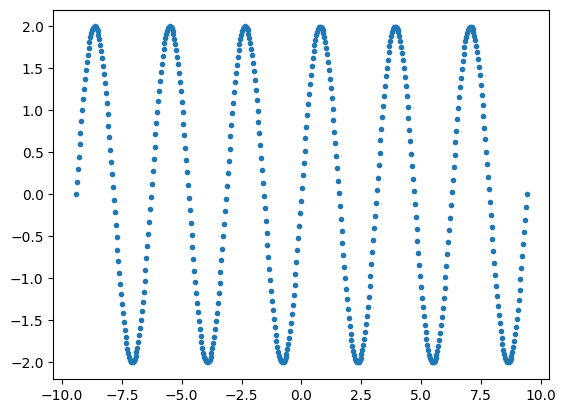

In [6]:
x_full = np.linspace(-3*math.pi, 3*math.pi, 500)
y_0 = 2*np.sin(2*x_full)

plt.plot(x_full, y_0, '.')

In [7]:
noise = np.random.normal(0,0.1, len(y_0))
y_real = y_0+noise

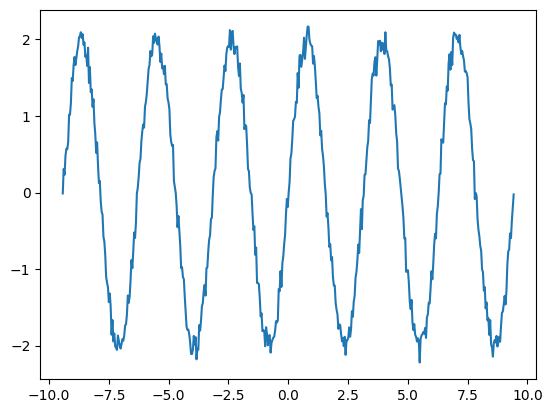

In [8]:
plt.plot(x_full, y_real)

In [9]:
cond = np.abs(x_full) > 2.5

In [10]:
x=x_full[cond]
y_real = y_real[cond]

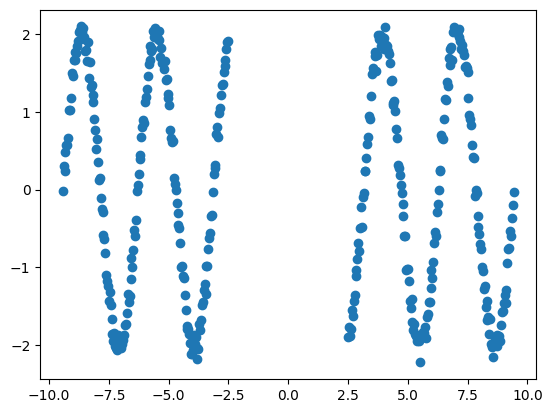

In [11]:
plt.plot(x, y_real,'o')

[1.99972473 2.0072684 ]


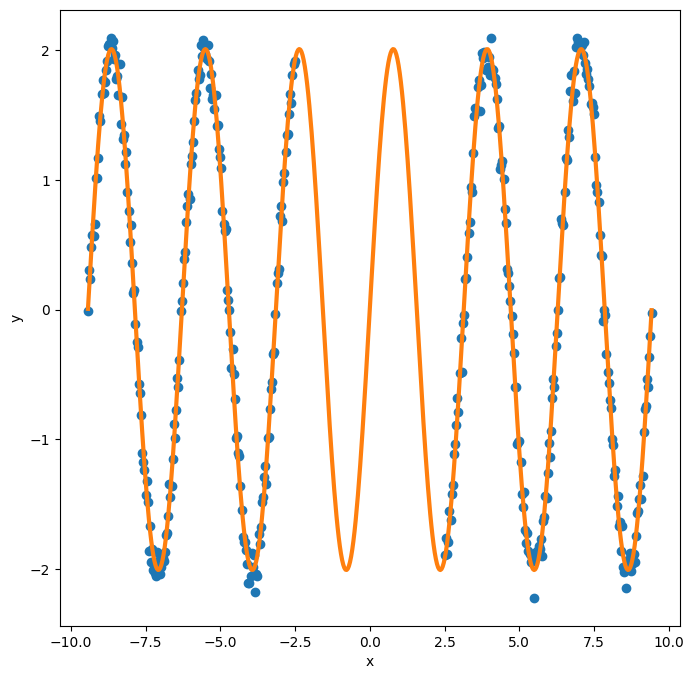

In [12]:
from scipy.optimize import curve_fit

def sin_function(x,b,a):
    return a * np.sin (b * x)

fig, ax = plt.subplots(figsize=(8,8))

p0 = [2 ,4] # stima iniziale
popt, pcov = curve_fit(sin_function, x, y_real, p0)
print(popt)
y_fit_function = sin_function(x_full, popt[0], popt[1])
ax.plot(x, y_real, 'o')
ax.plot(x_full, y_fit_function, "-", linewidth = 3)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

Plot della distribuzione dei residui

0.005344105499444681


Text(0, 0.5, 'Counts')

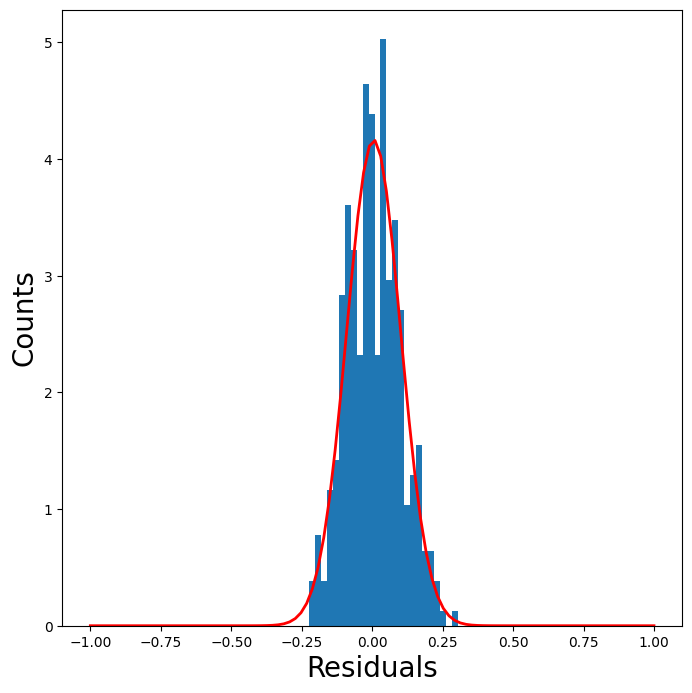

In [13]:
from scipy.stats import norm

fig, ax = plt.subplots(figsize=(8,8))
residuals = y_fit_function[cond]- y_real

mu, std = norm.fit(residuals) #adattiamo i residui a una normale
fit_range = np.linspace(-1,1,100)
y_pdf = norm.pdf(fit_range, mu, std)
print(mu)
m_hist = ax.hist(residuals, bins=25, density=True)

fit_curve = ax.plot(fit_range, y_pdf, c= "red", linewidth=2)
ax.set_xlabel("Residuals", size=20)
ax.set_ylabel("Counts", size=20)


(0.0, 400.0)

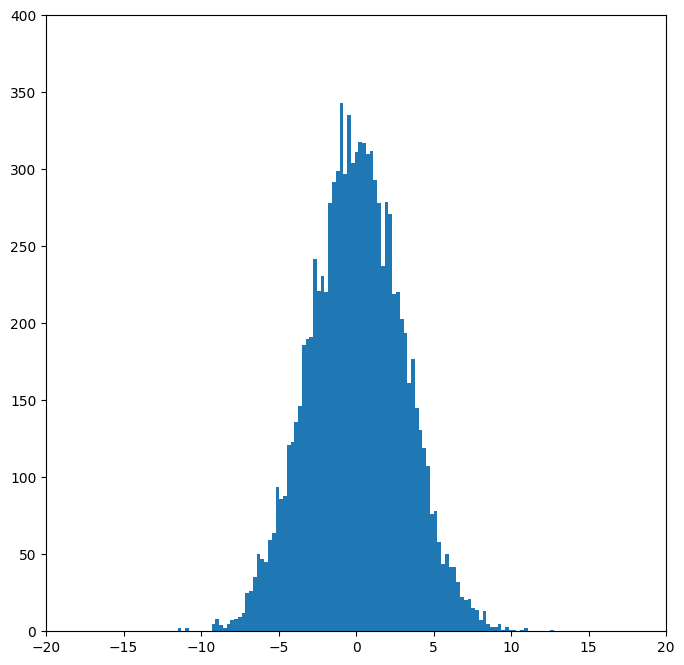

In [29]:
mean = 0
sigma = 3
entries = np.random.normal(mean, sigma, 10000)
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(entries, bins=100)
ax.set_xlim(-20,20)
ax.set_ylim(0,400)

## Esercizio Fitting
Sulla precedente fitta una curva e disegnacela sopra in rosso